In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
A = np.array([[1.1, 1.2748], [0.11767, 1.150]])
#A = np.array([[2, 3], [3, 2]])
A

array([[1.1    , 1.2748 ],
       [0.11767, 1.15   ]])

##  Normalized Power Interaction

### From Scratch

In [59]:
def normalized_power_interaction(A, iter_max=100):
    n = len(A)
    v = np.repeat(-1, n)
    v_lst = []
    v_lst.append(v)
    for i in range(iter_max):
        w = A @ v_lst[i]
        v_lst.append(w / np.linalg.norm(w))
        if (v_lst[i + 1].T @ v_lst[i]) < 0.0:
            v_lst[i+1]  = -v_lst[i+1]
        if np.linalg.norm(v_lst[i+1] - v_lst[i]) < 1e-6: 
            print("The number of iteration: {}".format(i + 1))
            break
    return v_lst

In [82]:
eigenvec_lst = normalized_power_interaction(A)
eigenvec = eigenvec_lst[-1]
eigenvec

The number of iteration: 18


array([-0.95129636, -0.30827785])

In [83]:
Z = A @ eigenvec
lamb = np.linalg.norm(Z)
lamb

1.5131125278068127

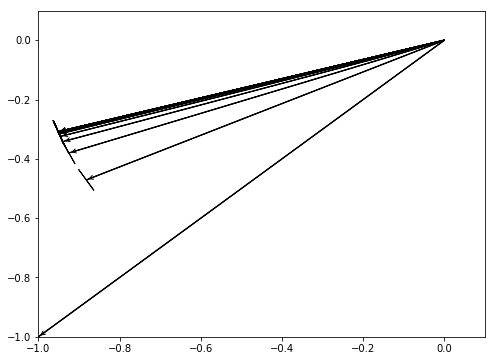

In [84]:
eigenvec_lst = np.array(eigenvec_lst)

plt.figure(figsize=(8, 6))
for e in eigenvec_lst:
    plt.arrow(0, 0, e[0], e[1], length_includes_head=True,
              head_width=0.08, head_length=0.00002)
    plt.annotate(s='', xy=(e[0], e[1]), xytext=(0, 0), 
                 arrowprops=dict(arrowstyle='->'))
plt.xlim(-1, 0.1)
plt.ylim(-1, 0.1)
plt.show()

### Using `Nympy`

In [18]:
eig_vals, eig_vecs = np.linalg.eig(A)

In [19]:
eig_vals.max()

1.5131117313351916

In [20]:
eig_vecs[:, np.argmax(eig_vals)]

array([-0.95129657, -0.3082772 ])